<h1 style="text-align: center; vertical-align: middle;">Numerical Methods in Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Python examples -- Week 1</h2>

<h2>Run this first!</h2>

Imports and modules:

In [2]:
from config import *
%matplotlib inline

<h2>Phase space plots based on Lagragian (slide 21)</h2>

In [4]:
m = 1 # point mass
g = 1 # magnitude of the gravitational field
l = 1 # length of the rod

In [5]:
def plot_arrow(theta, p, dt=1):
    # equations of motion:
    dtheta = p / (m * L*L) * dt
    dp = - m * g * L * np.sin(theta) * dt
    
    # plotting
    plt.scatter([theta], [p], s=50, c='r', marker='*', zorder=10)
    plt.annotate('', 
                 xytext=(theta, p), 
                 xy=(theta + dtheta, p + dp), 
                 arrowprops=dict(facecolor='black', shrink=0.03))

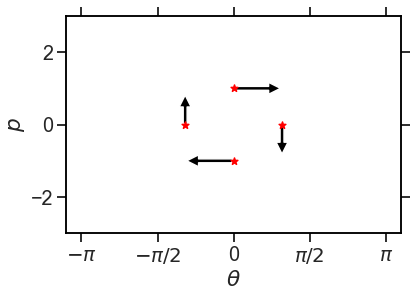

In [7]:
plot_arrow(1, 0)
plot_arrow(0, -1)
plot_arrow(-1, 0)
plot_arrow(0, 1)
#plot_arrow(1/1.41, 1/1.41)

# increase momentum:
#for i in np.arange(0.4, 2.5, 0.2):
#    plot_arrow(0, i)

# increase angle:
#for i in np.arange(1, np.pi * 1.1, 0.2):
#    plot_arrow(i, 0)

set_axes()

<h2>Hamiltonian of the pendulum (slide 25)</h2>

In [8]:
def hamiltonian(theta, p):
    T = p * p / (2 * m * L*L)
    U = m * g * L * (1 - np.cos(theta))
    return T + U

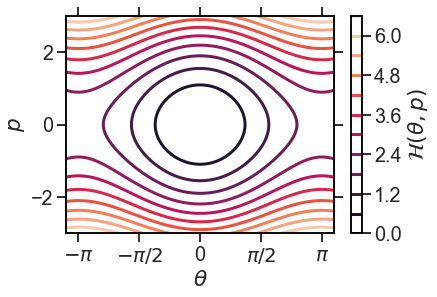

In [9]:
TH, PP = np.meshgrid(np.linspace(-np.pi * 1.1, np.pi * 1.1, 100), 
                     np.linspace(-3, 3, 100))

HH = hamiltonian(TH, PP)

plt.contour(TH, PP, HH, levels=10)
plt.colorbar(label=r'$\mathcal{H}(\theta, p)$')

set_axes()

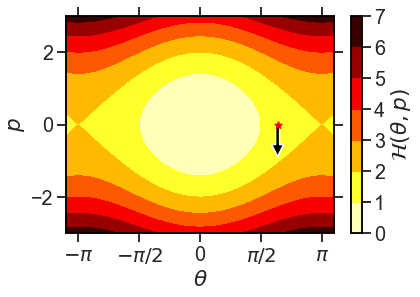

In [10]:
TH, PP = np.meshgrid(np.linspace(-np.pi * 1.1, np.pi * 1.1, 100), 
                     np.linspace(-3, 3, 100))

HH = hamiltonian(TH, PP)

plt.contourf(TH, PP, HH, cmap=plt.get_cmap('hot_r'))
plt.colorbar(label=r'$\mathcal{H}(\theta, p)$')

plot_arrow(2, 0)

set_axes()

<h2>Explicit Euler Method (slide 28)</h2>

In [11]:
def solve_euler(theta, p, dt=0.1):
    theta_next = theta + dt * p / (m * L*L)
    p_next = p - dt * m * g * L * np.sin(theta)
    return (theta_next, p_next)

<h3>First example</h3>

In [12]:
theta_ini = -1.1
p_ini = 0
n_steps = 100

In [13]:
results_euler = np.zeros((n_steps, 2), dtype=np.float32)
results_euler[0] = (theta_ini, p_ini)

for k in range(1, n_steps):
    results_euler[k] = solve_euler(*results_euler[k - 1])

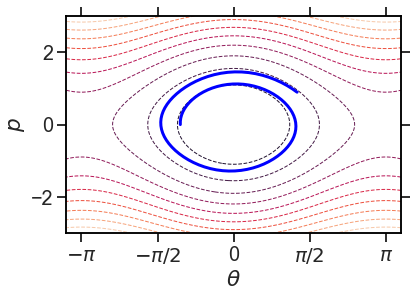

In [14]:
plt.contour(TH, PP, HH, levels=10, linestyles='--', linewidths=1)

plt.plot(results_euler[:, 0], results_euler[:, 1], c='b')

set_axes()

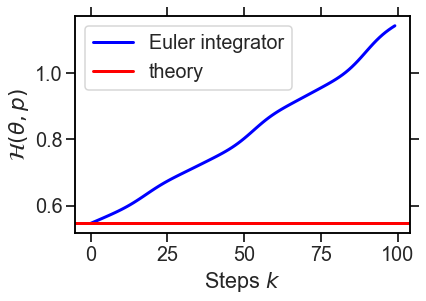

In [15]:
plt.plot(
    hamiltonian(results_euler[:, 0], results_euler[:, 1]), 
    c='b', label='Euler integrator')
plt.axhline(hamiltonian(theta_ini, p_ini), c='r', label='theory')

plt.xlabel('Steps $k$')
plt.ylabel(r'$\mathcal{H}(\theta, p)$')
plt.legend();

<h3>Second example: even worse!</h3>

In [17]:
theta_ini2 = -3.
p_ini2 = 0
n_steps = 100

In [18]:
results_euler2 = np.zeros((n_steps, 2), dtype=np.float32)
results_euler2[0] = (theta_ini2, p_ini2)

for k in range(1, n_steps):
    results_euler2[k] = solve_euler(*results_euler2[k - 1])

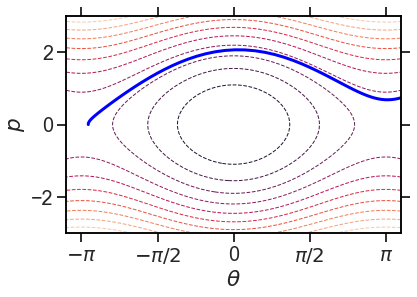

In [19]:
plt.contour(TH, PP, HH, levels=10, linestyles='--', linewidths=1)
plt.plot(results_euler2[:, 0], results_euler2[:, 1], c='b')
set_axes()

In [20]:
h_sep = hamiltonian(-np.pi, 0) # Value of Hamiltonian at separatrix
h_sep

2.0

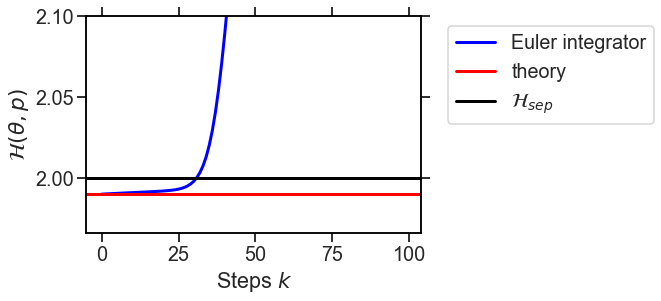

In [21]:
plt.plot(
    hamiltonian(results_euler2[:, 0], results_euler2[:, 1]), 
    c='b', label='Euler integrator')
plt.axhline(hamiltonian(theta_ini2, p_ini2), c='r', label='theory')
plt.axhline(h_sep, c='k', label='$\mathcal{H}_{sep}$')

plt.xlabel('Steps $k$')
plt.ylabel(r'$\mathcal{H}(\theta, p)$')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylim(top=2.1);